<a href="https://colab.research.google.com/github/Gladybams/Reconnaissance-faciale/blob/main/Reconnaissancefaciale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reconnaître des visages avec SVM

SVM est un algorithme assez puissant pour faire de la classification. Bien qu'on puisse l'utiliser sur des datasets classiques, tentons de regarder comment on pourrait faire de la reconnaissance de visages connus avec l'algorithme.

In [1]:
# On importe les librairies usuelles 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

On importe nos donnéés grace à sklearn.datasets

In [2]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
type(faces)

sklearn.utils.Bunch

In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

Observons les variables target_names

In [6]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [7]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


observons le shape

In [8]:
print(faces.images.shape)

(1348, 62, 47)


In [9]:
62*47

2914

---> Nous obtenons une np.array en trois dimension. La première dimension représente le nombre d'images la seconde l'hauteur de l'image, le nombre de pixel par colonne, la troisième dimension représente la largeur de l'image, le nombre de pixels sur une ligne, et la dernière représente les couleurs de chaque pixel.

Dans matplotlib, nous avons une méthode qui s'appelle imshow() qui nous permet de voir une image. Essayons d'utiliser cette méthode pour visualiser une image de notre dataset

Text(0.5, 0, 'George W Bush')

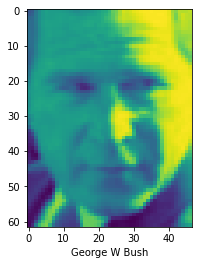

In [10]:
plt.imshow(faces.images[7])

plt.xlabel(faces.target_names[faces.target[7]])

Nous allons tenter maintenant de regarder les 15 premières images en utilisant une boucle.

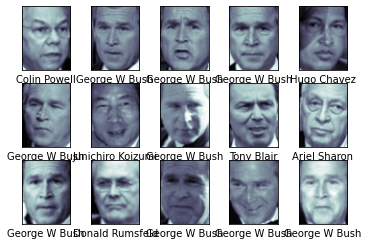

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

## Model

On importe Support Vector Machine de Sklearn et on instancie notre modèle

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced')

On split nos donées en train et en test 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                    faces.target,
                                                    test_size = 0.3,
                                                    random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

On fit nos données de train et ensuite on regarde le score

In [15]:
%time svm.fit(X_train, y_train)

CPU times: user 5.89 s, sys: 4.93 ms, total: 5.89 s
Wall time: 5.9 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
%time svm.score(X_test, y_test)

CPU times: user 1.39 s, sys: 0 ns, total: 1.39 s
Wall time: 1.4 s


0.7555555555555555

Notre score n'est pas incroyable, nous avons peut être fait une erreur dans l'instanciation de notre SVM. Nous allons faire une GridSearch pour voir quel modèle serait optimum

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=2, n_jobs=-1)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [18]:
%time grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.4min finished


CPU times: user 3.97 s, sys: 48.3 ms, total: 4.02 s
Wall time: 3min 26s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [19]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [20]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.8296296296296296

Notre score s'améliore mais, on peut encore faire mieux. Nous allons commencer quelque chose que nous allons voir plus en détail dans les prochains cours : PCA

Le principe de PCA est de combiner les variables dans un modèle pour garder uniquement les éléments les plus explicatifs.

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=0.99, whiten=True, random_state=42)

In [23]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(943, 371)

---> Ici, nous avons pris uniquement 0.99

In [24]:
pca.components_
pca.explained_variance_
pca.explained_variance_ratio_.sum()

0.99002373

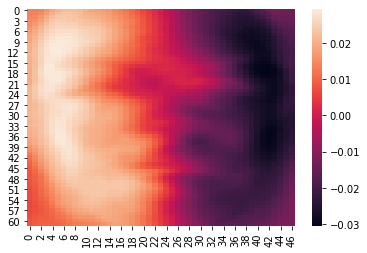

In [25]:
pc1 = pca.components_[1].reshape(62,47)
import seaborn as sns
sns.heatmap(pc1)

On refait un gridsearch avec les nouvelles données 

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=1)

In [28]:
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   57.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

On regarde le nouveau score 

In [29]:
grid.best_estimator_.score(X_test_pca, y_test)

0.7753086419753087

In [30]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

On crée une variable y_pred qui contiendra les predictions pour X_test_pca

In [31]:
y_pred = grid.best_estimator_.predict(X_test_pca)

 On regarde nos résultats sur une matrice de confusion

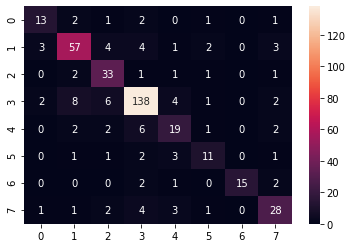

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Tentons de regarder quelques images avec les prédictions que nous avons faites.

On visualise des images avec leurs prédictions.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

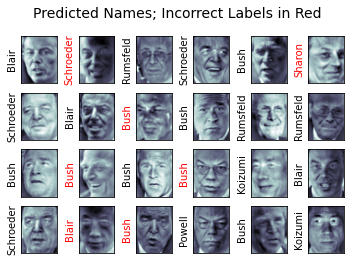

In [33]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)